## Word2Vec

Original Source: https://www.geeksforgeeks.org/implement-your-own-word2vecskip-gram-model-in-python/

The word2vec algorithm uses a neural network model to learn word associations from a large corpus of text. Once trained, such a model can detect synonymous words or suggest additional words for a partial sentence.

In 2013, Google announched word2vec, a group of related models that are used to produce word embeddings.

In skip gram architecture of word2vec, the input is the center word and the predictions are the context words.



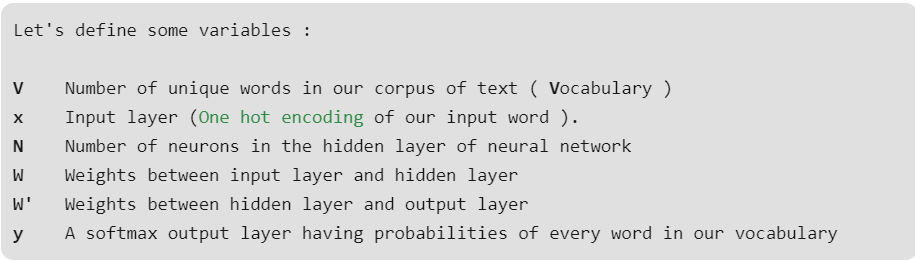


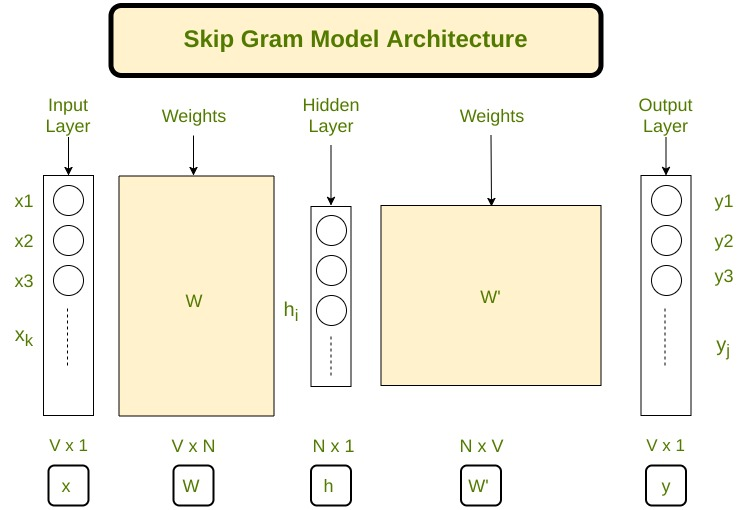

X is one hot word symbol of word. (Center word)


W is word embedding matrix

h is representation of center word.

W` is representation of context words.

y is output but we will use softmax before getting final output. 

In [7]:
import numpy as np 
import string 
import nltk
nltk.download('stopwords')

def softmax(x): 
	"""Compute softmax values for each sets of scores in x."""
	e_x = np.exp(x - np.max(x)) 
	return e_x / e_x.sum() 

class word2vec(object): 
	def __init__(self): 
		self.N = 10
		self.X_train = [] 
		self.y_train = [] 
		self.window_size = 2
		self.alpha = 0.001
		self.words = [] 
		self.word_index = {} 

	def initialize(self,V,data): 
		self.V = V 
		self.W = np.random.uniform(-0.8, 0.8, (self.V, self.N)) 
		self.W1 = np.random.uniform(-0.8, 0.8, (self.N, self.V)) 
		
		self.words = data 
		for i in range(len(data)): 
			self.word_index[data[i]] = i 

	
	def feed_forward(self,X): 
		self.h = np.dot(self.W.T,X).reshape(self.N,1) 
		self.u = np.dot(self.W1.T,self.h) 
		#print(self.u) 
		self.y = softmax(self.u) 
		return self.y 
		
	def backpropagate(self,x,t): 
		e = self.y - np.asarray(t).reshape(self.V,1) 
		# e.shape is V x 1 
		dLdW1 = np.dot(self.h,e.T) 
		X = np.array(x).reshape(self.V,1) 
		dLdW = np.dot(X, np.dot(self.W1,e).T) 
		self.W1 = self.W1 - self.alpha*dLdW1 
		self.W = self.W - self.alpha*dLdW 
		
	def train(self,epochs): 
		for x in range(1,epochs):		 
			self.loss = 0
			for j in range(len(self.X_train)): 
				self.feed_forward(self.X_train[j]) 
				self.backpropagate(self.X_train[j],self.y_train[j]) 
				C = 0
				for m in range(self.V): 
					if(self.y_train[j][m]): 
						self.loss += -1*self.u[m][0] 
						C += 1
				self.loss += C*np.log(np.sum(np.exp(self.u))) 
			print("epoch ",x, " loss = ",self.loss) 
			self.alpha *= 1/( (1+self.alpha*x) ) 
			
	def predict(self,word,number_of_predictions): 
		if word in self.words: 
			index = self.word_index[word] 
			X = [0 for i in range(self.V)] 
			X[index] = 1
			prediction = self.feed_forward(X) 
			output = {} 
			for i in range(self.V): 
				output[prediction[i][0]] = i 
			
			top_context_words = [] 
			for k in sorted(output,reverse=True): 
				top_context_words.append(self.words[output[k]]) 
				if(len(top_context_words)>=number_of_predictions): 
					break
	
			return top_context_words 
		else: 
			print("Word not found in dicitonary") 


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\orhun\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [8]:
def preprocessing(corpus): 
	stop_words = set(stopwords.words('english'))	 
	training_data = [] 
	sentences = corpus.split(".") 
	for i in range(len(sentences)): 
		sentences[i] = sentences[i].strip() 
		sentence = sentences[i].split() 
		x = [word.strip(string.punctuation) for word in sentence 
									if word not in stop_words] 
		x = [word.lower() for word in x] 
		training_data.append(x) 
	return training_data 
	

def prepare_data_for_training(sentences,w2v): 
	data = {} 
	for sentence in sentences: 
		for word in sentence: 
			if word not in data: 
				data[word] = 1
			else: 
				data[word] += 1
	V = len(data) 
	data = sorted(list(data.keys())) 
	vocab = {} 
	for i in range(len(data)): 
		vocab[data[i]] = i 
	
	#for i in range(len(words)): 
	for sentence in sentences: 
		for i in range(len(sentence)): 
			center_word = [0 for x in range(V)] 
			center_word[vocab[sentence[i]]] = 1
			context = [0 for x in range(V)] 
			
			for j in range(i-w2v.window_size,i+w2v.window_size): 
				if i!=j and j>=0 and j<len(sentence): 
					context[vocab[sentence[j]]] += 1
			w2v.X_train.append(center_word) 
			w2v.y_train.append(context) 
	w2v.initialize(V,data) 

	return w2v.X_train,w2v.y_train 


In [9]:
corpus = "" 
corpus += "The earth revolves around the sun. The moon revolves around the earth"
epochs = 1000

training_data = preprocessing(corpus) 
w2v = word2vec() 

prepare_data_for_training(training_data,w2v) 
w2v.train(epochs) 

print(w2v.predict("around",3))	 


epoch  1  loss =  45.513522138864424
epoch  2  loss =  45.42815862652692
epoch  3  loss =  45.34341738474342
epoch  4  loss =  45.25937459656983
epoch  5  loss =  45.176103476109766
epoch  6  loss =  45.093673891904494
epoch  7  loss =  45.012152030539404
epoch  8  loss =  44.93160010422953
epoch  9  loss =  44.8520761051379
epoch  10  loss =  44.773633608142504
epoch  11  loss =  44.69632162273266
epoch  12  loss =  44.62018449372124
epoch  13  loss =  44.545261849533276
epoch  14  loss =  44.471588596002356
epoch  15  loss =  44.399194952889125
epoch  16  loss =  44.32810652974925
epoch  17  loss =  44.25834443732271
epoch  18  loss =  44.18992543029788
epoch  19  loss =  44.122862077114
epoch  20  loss =  44.05716295239858
epoch  21  loss =  43.992832847677505
epoch  22  loss =  43.92987299613171
epoch  23  loss =  43.86828130738884
epoch  24  loss =  43.8080526086146
epoch  25  loss =  43.74917888849095
epoch  26  loss =  43.6916495410206
epoch  27  loss =  43.63545160646688
epoch 

epoch  278  loss =  40.990895558856614
epoch  279  loss =  40.98936951209446
epoch  280  loss =  40.98785431933819
epoch  281  loss =  40.98634986614804
epoch  282  loss =  40.98485603967431
epoch  283  loss =  40.98337272862994
epoch  284  loss =  40.981899823263866
epoch  285  loss =  40.98043721533479
epoch  286  loss =  40.978984798085506
epoch  287  loss =  40.97754246621782
epoch  288  loss =  40.97611011586782
epoch  289  loss =  40.97468764458182
epoch  290  loss =  40.97327495129261
epoch  291  loss =  40.97187193629633
epoch  292  loss =  40.970478501229714
epoch  293  loss =  40.96909454904779
epoch  294  loss =  40.967719984002066
epoch  295  loss =  40.966354711619104
epoch  296  loss =  40.96499863867954
epoch  297  loss =  40.96365167319744
epoch  298  loss =  40.962313724400225
epoch  299  loss =  40.960984702708785
epoch  300  loss =  40.959664519718096
epoch  301  loss =  40.95835308817821
epoch  302  loss =  40.95705032197561
epoch  303  loss =  40.9557561361148
epoc

epoch  558  loss =  40.77723596249407
epoch  559  loss =  40.77685725837783
epoch  560  loss =  40.77647991242165
epoch  561  loss =  40.7761039173477
epoch  562  loss =  40.77572926592987
epoch  563  loss =  40.77535595099345
epoch  564  loss =  40.77498396541458
epoch  565  loss =  40.77461330211983
epoch  566  loss =  40.77424395408577
epoch  567  loss =  40.77387591433858
epoch  568  loss =  40.77350917595344
epoch  569  loss =  40.7731437320543
epoch  570  loss =  40.772779575813374
epoch  571  loss =  40.77241670045065
epoch  572  loss =  40.77205509923358
epoch  573  loss =  40.77169476547663
epoch  574  loss =  40.77133569254083
epoch  575  loss =  40.77097787383344
epoch  576  loss =  40.77062130280747
epoch  577  loss =  40.77026597296139
epoch  578  loss =  40.7699118778386
epoch  579  loss =  40.76955901102717
epoch  580  loss =  40.7692073661594
epoch  581  loss =  40.7688569369114
epoch  582  loss =  40.76850771700283
epoch  583  loss =  40.76815970019638
epoch  584  loss

epoch  842  loss =  40.705949945193666
epoch  843  loss =  40.705784113429
epoch  844  loss =  40.705618676277545
epoch  845  loss =  40.70545363233381
epoch  846  loss =  40.705288980198844
epoch  847  loss =  40.70512471848042
epoch  848  loss =  40.70496084579281
epoch  849  loss =  40.70479736075691
epoch  850  loss =  40.704634262000056
epoch  851  loss =  40.70447154815609
epoch  852  loss =  40.704309217865266
epoch  853  loss =  40.70414726977422
epoch  854  loss =  40.70398570253597
epoch  855  loss =  40.70382451480983
epoch  856  loss =  40.703663705261405
epoch  857  loss =  40.7035032725625
epoch  858  loss =  40.703343215391214
epoch  859  loss =  40.70318353243176
epoch  860  loss =  40.70302422237443
epoch  861  loss =  40.70286528391576
epoch  862  loss =  40.70270671575821
epoch  863  loss =  40.70254851661033
epoch  864  loss =  40.70239068518666
epoch  865  loss =  40.70223322020771
epoch  866  loss =  40.70207612039988
epoch  867  loss =  40.701919384495476
epoch  

## References

1) Creating Word2vec class by yourself 

https://towardsdatascience.com/an-implementation-guide-to-word2vec-using-numpy-and-google-sheets-13445eebd281

https://github.com/DerekChia/word2vec_numpy/blob/master/wordtovec.py

2) Create your own word2vec

https://www.geeksforgeeks.org/implement-your-own-word2vecskip-gram-model-in-python/

3) Detail Explanation

https://www.youtube.com/watch?v=ERibwqs9p38
